# Исследование данных для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
- Изучим общую информацию из полученных данных.
- Проверим корректность полученных данных, зафиксируем или попробуем исправить недостающие или неправдоподобные данные.
- Добавим несколько столбцов для удобного изучения данных.
- Просмотрим каждый столбец более детально и попробуем сделать аналитику.
- Выявим факторы, которын больше всего влияют на успешность игры.
- Установим самый потенциально популярный продукт.
- Сделаем общий вывод.

### Откроем файл с данными и изучим общую информацию. 

In [ ]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


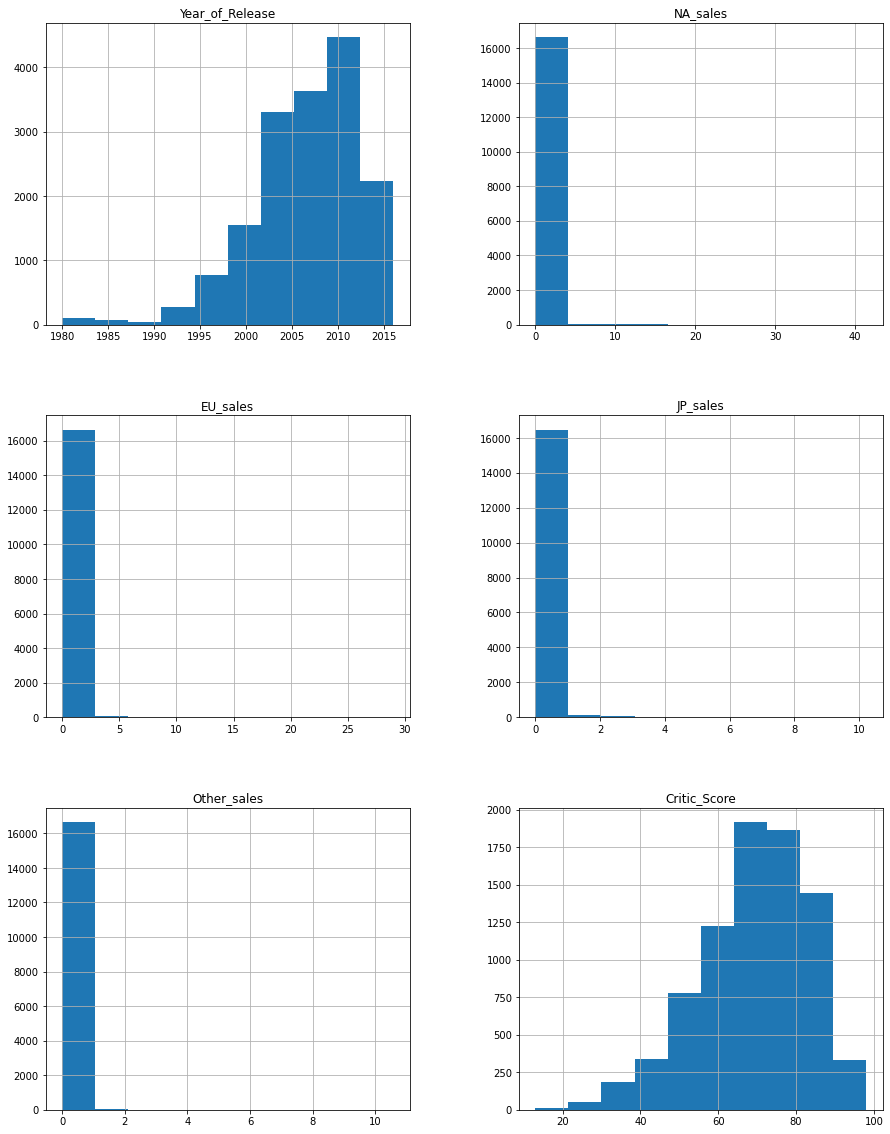

In [ ]:
#код загрузки датасета
df = pd.read_csv('/datasets/games.csv')
df.info()
display(df.head(10))
df.hist(figsize=(15, 20));

### Предобработка данных

#### check gap
1. Заменим названия столбцов (приведем к нижнему регистру)

In [ ]:
#Заменим названия столбцов (приведем к нижнему регистру)
df.columns = map(str.lower, df.columns)

2. Преобразуем данные в нужные типы. Опишим, в каких столбцах заменили тип данных и почему; 

In [ ]:
#Преобразуем данные в нужные типы
df['year_of_release'] = df['year_of_release'].astype('Int64')
#В столбце user_score есть значение tbd. Метод info() говорит о том, что формат ячейки object. 
#Просмотрев общее содержание, а так же по описанию столбца (оценка пользователей (максимум 10)) тип данных должен быть float. 
#Поэтому предлагаю изменить на NaN.
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB



В столбце user_score есть значение tbd. Выше мы воспользовались методом info() и обратили внимание, что формат ячейки object. Хотя судя по общему содержанию, а так же по описанию столбца (оценка пользователей (максимум 10)) тип данных должен быть float. Поэтому предлагаю считать данное значение (tbd) пустым и изменить на NaN.


3. Находим и изучаем пропущенные значения в столбцах:
+ Есть пропуски в столбцах со значениями: название игры, год выпуска, жанр игры, оценка критиков, оценка пользователей, рейтинг от организации ESRB.
    + Название игры. Оставить значения пустыми нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому удаляем эти 2 строки, иначе они повлияют на статистику. Возможно название игры еще не утверждено.

    + В столбцах оценка критиков, оценка пользователей довольно много пропущенных значений. Заполнять не будем, т.к. это исказит результат. Возможно до оценок игр еще не добрались.

    + Год выпуска. Предлагаю удалить пропуски, чтобы не было нелогичного установления года выпуска. Пропуск возможно вызван тем, что игра еще не сертифицирована.

    + Жанр игры. Так же удаляем строки с пустыми значениями. Пропуск в данном столбце мог возникнуть из-за того, что жанр просто забыли указать.

    + Рейтинг от организации ESRB. Заменим на неопределнный тип.
+ Нужно сообщить о том, что есть такие пропуски.

In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

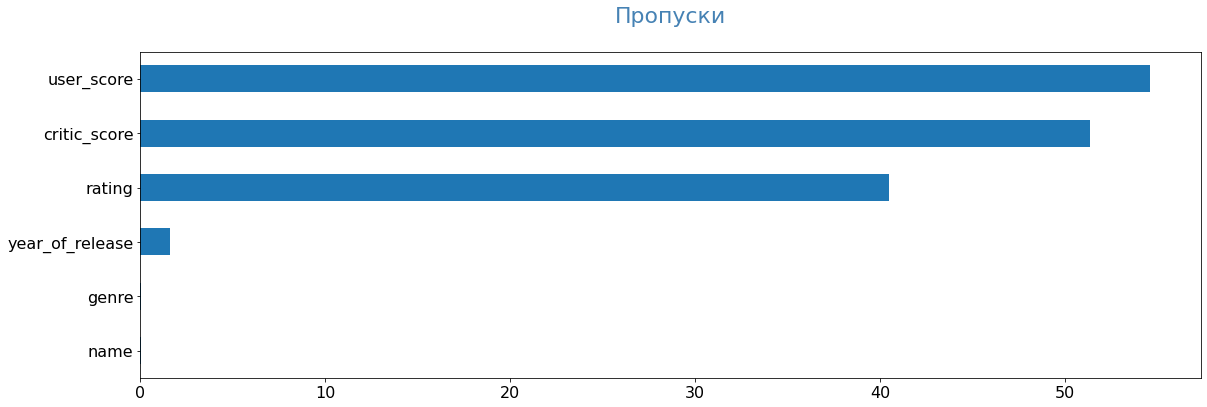

In [ ]:
pass_value_barh(df)

In [ ]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


In [ ]:
# Удаляем пропуски
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
#Замена NaN на "неопределенный".
df['rating'] = df['rating'].replace(np.NaN, 'none')
# проверяем количество пропусков после удаления
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

4. Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [ ]:
#посчитаем суммарные продажи во всех регионах
df['total_sales'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
#check
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,none,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,none,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,none,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,none,28.31


In [ ]:
print(df.duplicated().sum())

0


Сделал проверку на дубликаты, их нет.

### Проведем исследовательский анализ данных

#### check gap
Проведем исследовательский анализ данных:
   + Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
   + Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
   + Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
   + Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
   + Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.
   + Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
   + Соотнесем выводы с продажами игр на других платформах.
   + Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


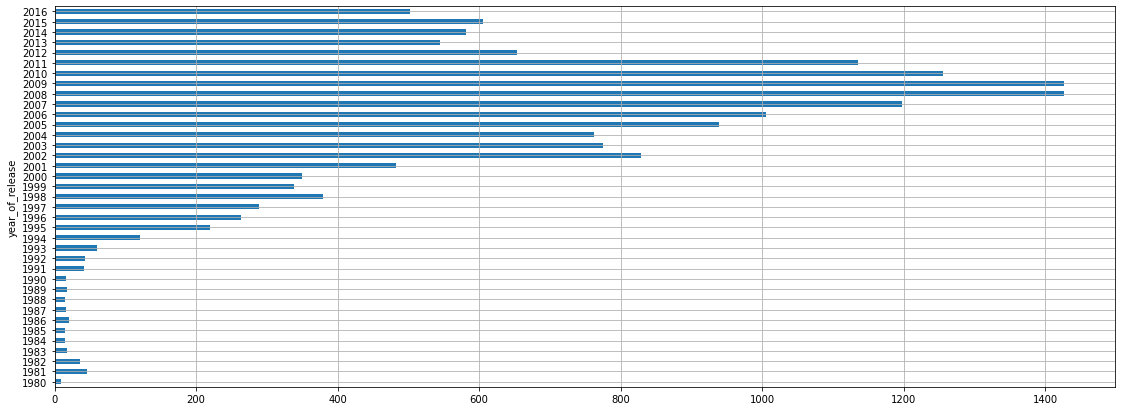

In [ ]:
#Посчитаем кол-во игр в разные годы
count_games = df.groupby('year_of_release')['name'].count()
print(count_games)
count_games.plot(kind='barh', grid=True, figsize=(19, 7));

Мы возьмем данные за последние пять лет. Они будут наиболее актуальные. 
Также видно, что с 1980 по 1993 отрасль только зарождалась, с 1994 по 2005 она продолжала развиваться и с 2006 по 2011 пришелся самый бум выхода различных игр.

<AxesSubplot:xlabel='year_of_release'>

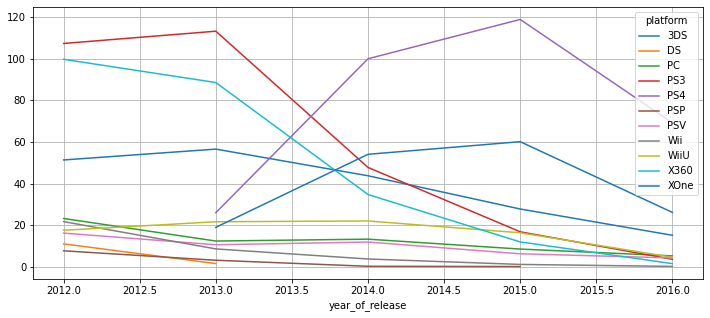

In [ ]:
#Берем данные за последние пять лет.
df_2012_2016 = df.query("2012 <= year_of_release <= 2016")
# Построим график распределения по годам
df_2012_2016.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 5))

По графику видно, что продажи у некоторых платформ после 2013 года пошли на спад. И в этом же году появились две новые PS4 и XOne. 

   + Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [ ]:
#Выбираем платформы с наибольшими продажами
df_platform_sum = df_2012_2016.groupby(['platform'])['total_sales'].sum()
print(df_platform_sum.sort_values(ascending=False))

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64


Отсюда видно, что наибольшие продажи собрали 5 платформ: PS4, PS3, X360, 3DS , XOne. 

<AxesSubplot:xlabel='year_of_release'>

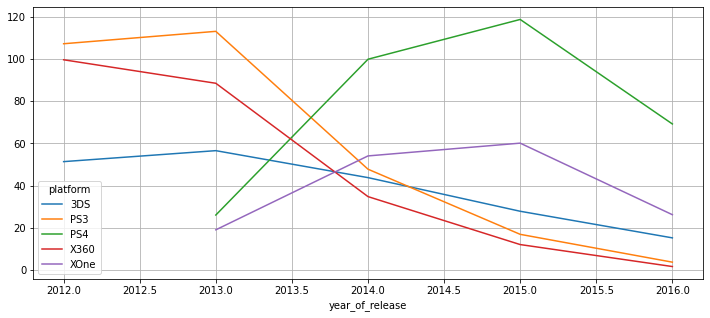

In [ ]:
# Построим по самым продаваемым платформам график суммарных продаж по годам
df_2012_2016_query = df_2012_2016.query("platform == ['PS4', 'PS3', 'X360', '3DS' , 'XOne']")
df_2012_2016_query.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 5))

   + За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
#Выбираем платформы с наибольшими продажами за все годы
df_platform__total_sum = df.groupby(['platform'])['total_sales'].sum()
print(df_platform__total_sum.sort_values(ascending=False))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


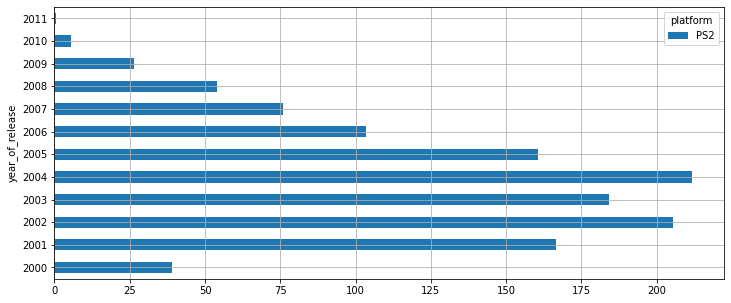

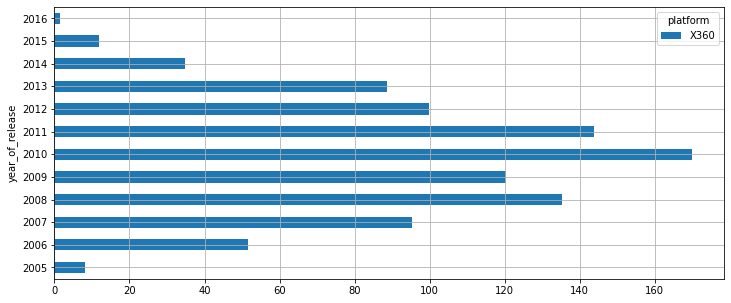

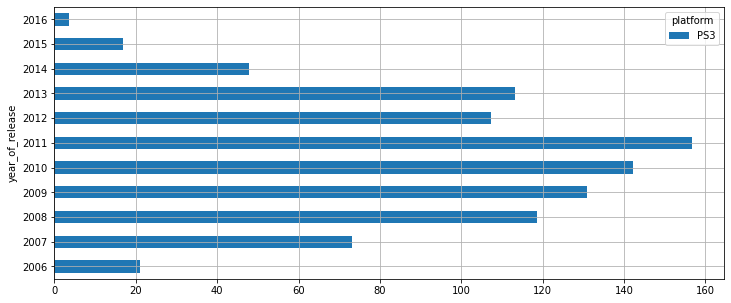

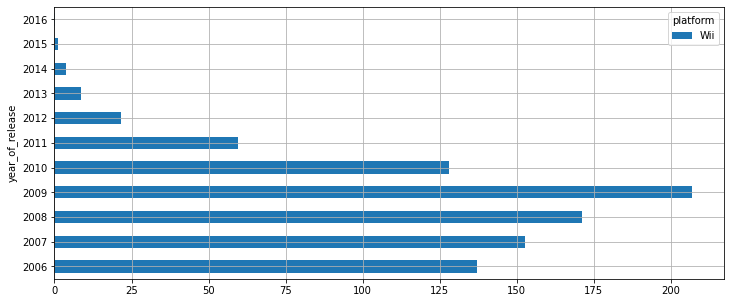

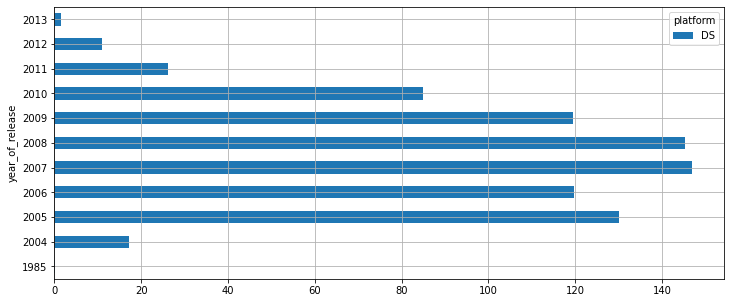

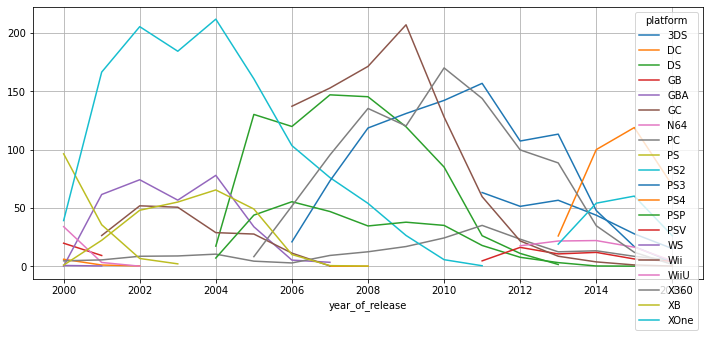

In [ ]:
#Далее по пяти самым продаваемым из них сделаем вывод о жизненных циклах
df_ps2 = df.query("platform == ['PS2']")
df_ps2.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(kind='barh', grid=True, figsize=(12, 5));
df_X360 = df.query("platform == ['X360']")
df_X360.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(kind='barh', grid=True, figsize=(12, 5));
df_PS3 = df.query("platform == ['PS3']")
df_PS3.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(kind='barh', grid=True, figsize=(12, 5));
df_Wii = df.query("platform == ['Wii']")
df_Wii.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(kind='barh', grid=True, figsize=(12, 5));
df_DS = df.query("platform == ['DS']")
df_DS.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(kind='barh', grid=True, figsize=(12, 5));
df_2000_2016 = df.query("2000 <= year_of_release <= 2016")
df_2000_2016.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 5));

В 2000 году появилась приставка PS2 и продавалась по 2011 год. 
В 2005 году появилась приставка X360 и продавалась по 2016 год.
В 2006 году появилась приставка PS3 и продавалась по 2016 год.
В 2006 году появилась приставка Wii и продавалась по 2016 год.
В 2004 году появилась приставка DS и продавалась по 2013 год.
Можно сделать вывод, что срок жизни приставок 9-10 лет. За это время появляются новые и уходят старые приставки. Есть и более короткий срок жизни, но это не топовые приставки. 

В результате исследования предыдущих вопросов, актуальным периодом мы считаем последние пять лет с 2012 г по 2016 гг. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
Лидируют по продажам пять платформ: PS4, PS3, X360, 3DS , XOne. Если с 2013 года появились две новые платформы(XOne, PS4), у которых продажи росли, то с 2015 года продажи падают у всех пяти платформ.

   + Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.

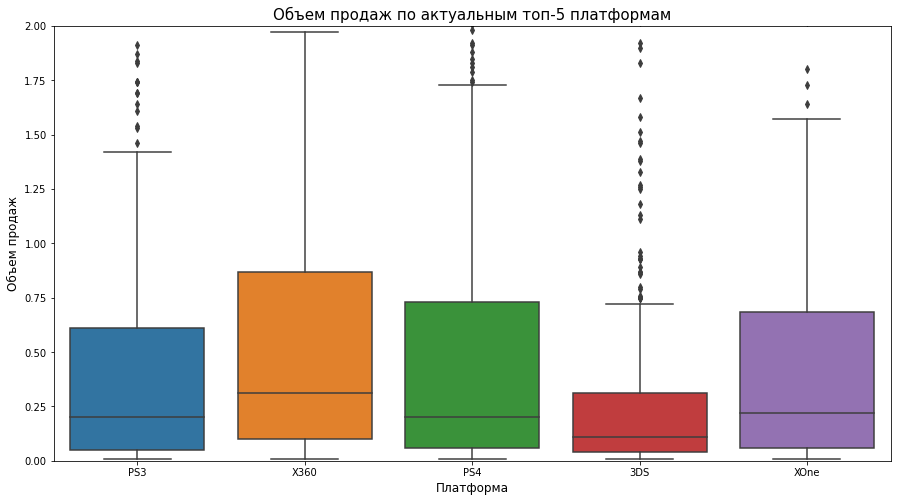

In [ ]:
#Построим общую диаграмму размаха
plt.figure(figsize=(15,8))
plt.ylim(0, 2)
sns.boxplot(data=df_2012_2016_query, x='platform', y='total_sales');
plt.title('Объем продаж по актуальным топ-5 платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show()

Смотря на общую диаграмму размаха мы видим частые выбросы и редкие. Данные выбросы оставим, т.к. разные игры, собирают разные продажи и порой их сумма может отличаться в разы.

   + Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Для анализа возьмем платформу PS4, у нее самые большие продажи в последние пять лет.
   

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


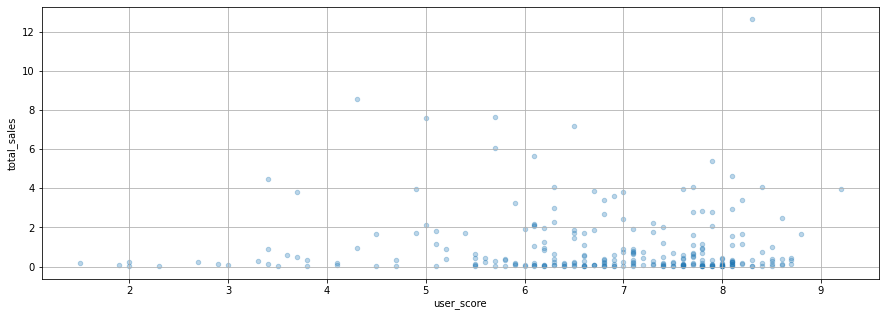

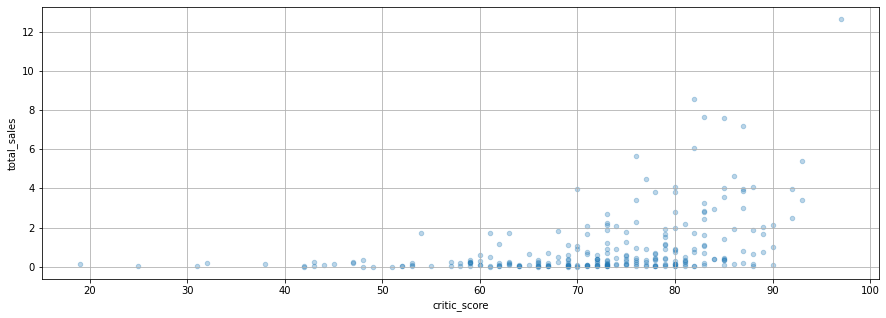

In [ ]:
#Выведем таблицу рассеяния, отобразив отзывы пользователей.
df_2012_2016[df_2012_2016['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(15,5), grid=True)
#Выведем таблицу рассеяния, отобразив отзывы критиков
df_2012_2016[df_2012_2016['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(15,5), grid=True)
#Посчитаем корреляцию
columns = ['user_score', 'critic_score', 'total_sales']
subset = df_2012_2016[df_2012_2016['platform']=='PS4'][columns]
subset.corr()

Посмотрев графики рассеяния и корреляцию можно сделать вывод, что отзывы пользователей отрицательно коррелируют с продажами, отсюда следует, что чем больше отрицательных отзывов, тем меньше продаж.  Отзывы критиков слабо коррелируют с продажами. Отсюда следует, что чем лучше отзывы, тем больше продаж.


+ Соотнесем выводы с продажами игр на других платформах.


Платформа  PS3
Коэффициент корреляции Пирсона
total_sales     1.000000
user_score     -0.005144
critic_score    0.331497
Name: total_sales, dtype: float64

Платформа  X360
Коэффициент корреляции Пирсона
total_sales     1.000000
user_score      0.006164
critic_score    0.360573
Name: total_sales, dtype: float64

Платформа  PS4
Коэффициент корреляции Пирсона
total_sales     1.000000
user_score     -0.031957
critic_score    0.406568
Name: total_sales, dtype: float64

Платформа  3DS
Коэффициент корреляции Пирсона
total_sales     1.000000
user_score      0.197583
critic_score    0.320803
Name: total_sales, dtype: float64

Платформа  XOne
Коэффициент корреляции Пирсона
total_sales     1.000000
user_score     -0.068925
critic_score    0.416998
Name: total_sales, dtype: float64



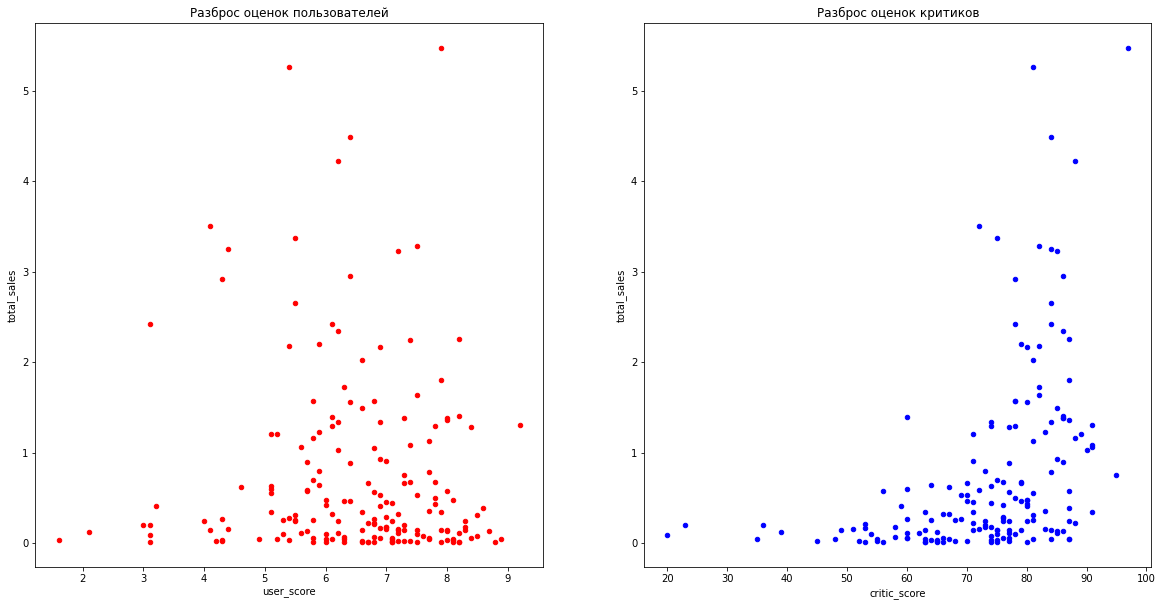

In [ ]:
#Выведем таблицы рассеяния, отобразив отзывы пользователей, отзывы критиков для еще 5 платформ
for platform in df_2012_2016_query['platform'].unique():
    print('Платформа ', platform)
    temp_df = df_2012_2016_query.query('platform == "' + platform + '"')
    print('Коэффициент корреляции Пирсона')
    print(temp_df[['total_sales', 'user_score', 'critic_score']].corr()['total_sales'])
    print()
    
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
temp_df.plot(kind='scatter', y='total_sales', x='user_score', color='r', ax=ax1, figsize=(20,10), 
            title='Разброс оценок пользователей');
temp_df.plot(kind='scatter', y='total_sales', x='critic_score', color='b', ax=ax2, 
            title='Разброс оценок критиков');
plt.show()

In [ ]:
#Посчитаем корреляцию для всех платформ
columns = ['user_score', 'critic_score', 'total_sales']
subset = df_2012_2016[columns]
subset.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.517727,0.004429
critic_score,0.517727,1.000000,0.308197
total_sales,0.004429,0.308197,1.000000


Корреляция на других платформах почти такая же. Поэтом можно сделать такой же вывод, что отзывы пользователей отрицательно коррелируют с продажами, отсюда следует, что чем больше отрицательных отзывов, тем меньше продаж. Отзывы критиков слабо коррелируют с продажами. Отсюда следует, что чем лучше отзывы, тем больше продаж.

   + Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

genre
Platform        0.27
Shooter         0.24
Sports          0.22
Fighting        0.21
Action          0.19
Racing          0.19
Role-Playing    0.18
Misc            0.16
Simulation      0.15
Puzzle          0.10
Strategy        0.10
Adventure       0.05
Name: total_sales, dtype: float64
genre
Shooter         0.585
Sports          0.390
Racing          0.225
Platform        0.210
Role-Playing    0.200
Fighting        0.180
Action          0.170
Misc            0.150
Simulation      0.130
Strategy        0.085
Puzzle          0.070
Adventure       0.060
Name: total_sales, dtype: float64


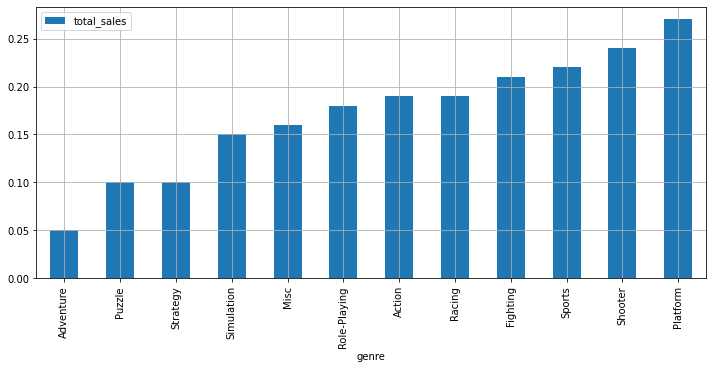

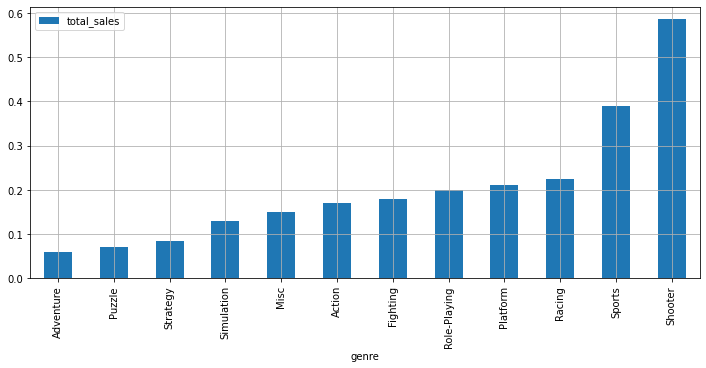

In [ ]:
#Посмотрим популярность жанров на всех платформах за все время
df.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales').plot(kind='bar', grid=True, figsize=(12, 5))
df_genre_total_median = df.groupby(['genre'])['total_sales'].median()
print(df_genre_total_median.sort_values(ascending=False))
#Посмотрим популярность жанров на всех платформах за последние 5 лет
df_2012_2016_query.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales').plot(kind='bar', grid=True, figsize=(12, 5))
df_2012_2016_genre_total_median = df_2012_2016_query.groupby(['genre'])['total_sales'].median()
print(df_2012_2016_genre_total_median.sort_values(ascending=False))

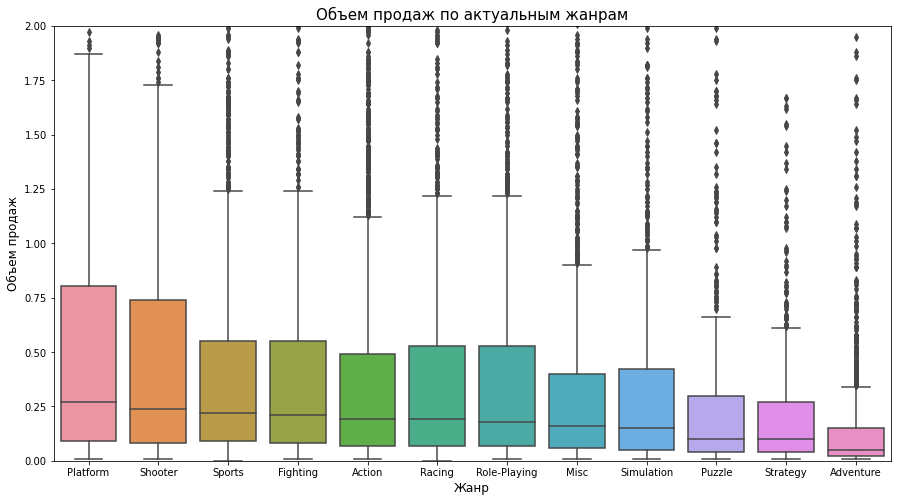

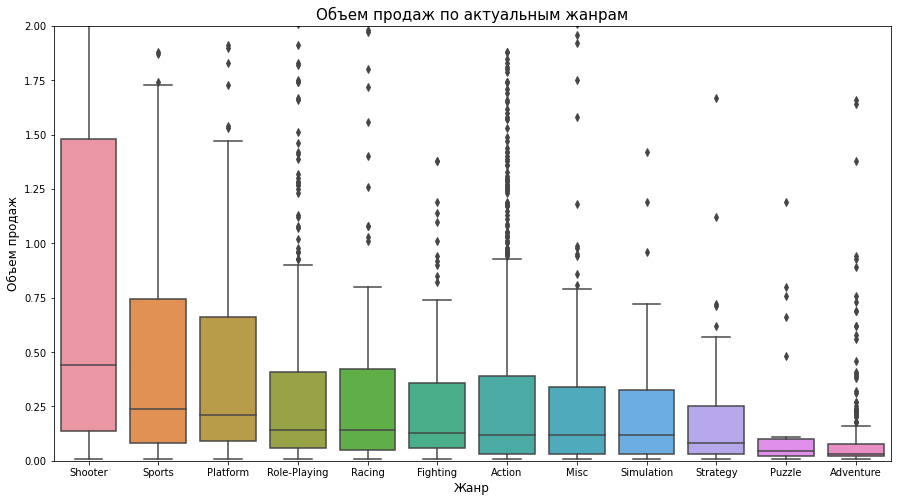

In [ ]:
# Посмотрим популярность жанров на всех платформах за все время диаграммой размаха
median_order = (df.groupby('genre')['total_sales'].median().sort_values(ascending=False))
plt.figure(figsize=(15,8))
plt.ylim(0, 2)
sns.boxplot(data=df, x='genre', y='total_sales', order=median_order.index);
plt.title('Объем продаж по актуальным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show()
# Посмотрим популярность жанров на всех платформах за последние 5 лет диаграммой размаха
median_order_2012_2016 = (df_2012_2016.groupby('genre')['total_sales'].median().sort_values(ascending=False))
plt.figure(figsize=(15,8))
plt.ylim(0, 2)
sns.boxplot(data=df_2012_2016, x='genre', y='total_sales', order=median_order_2012_2016.index);
plt.title('Объем продаж по актуальным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show()

За все время самыми популярными жанрами являлись:  Platform, Shooter, Sports, Fighting, Action.
А за последние 5 лет самыми популярными являлись: Shooter, Sports,  Platform, Role-Playing, Racing. Также за последние пять лет есть два типа жанры с наименьшими продажами: Puzzle, Adventure.

#### Вывод.

Мы установили и взяли данные за последние пять лет. Они будут наиболее актуальные для анализа рынка. 
Из исследования видно, что с 1980 по 1993 отрасль только зарождалась, с 1994 по 2005 она продолжала развиваться и с 2006 по 2011 пришелся самый бум выхода различных игр.
Мы выяснили, что продажи у некоторых платформ после 2013 года пошли на спад. И в этом же году появились две новые приставки PS4 и XOne. 

Самыми продаваемыми стали 5 платформ: PS4, PS3, X360, 3DS , XOne.

Мы сделали вывод, что срок жизни приставок 9-10 лет (за это время появляются новые и уходят старые приставки). Есть и более короткий срок жизни, но это не топовые приставки. 

Мы посмотрели на общую диаграмму размаха и увидели частые выбросы и редкие. Данные выбросы оставили, т.к. разные игры, собирают разные продажи и порой их сумма может отличаться в разы.

Посмотрев графики рассеяния и корреляцию сделали вывод, что отзывы пользователей отрицательно коррелируют с продажами, отсюда следует, что чем больше отрицательных отзывов, тем меньше продаж.  Отзывы критиков слабо коррелируют с продажами. Отсюда следует, что чем лучше отзывы, тем больше продаж.

За все время самыми популярными жанрами являлись:  Platform, Shooter, Sports, Fighting, Action.
А за последние 5 лет самыми популярными являлись: Shooter, Sports,  Platform, Role-Playing, Racing. Также за последние пять лет есть два типа жанры с наименьшими продажами: Puzzle, Adventure.

### Составим портрет пользователя каждого региона

#### Check gap.
Определим для пользователя каждого региона (NA, EU, JP):
   + Самые популярные платформы (топ-5). Опишите различия в долях продаж.
   + Самые популярные жанры (топ-5). Поясните разницу.
   + Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

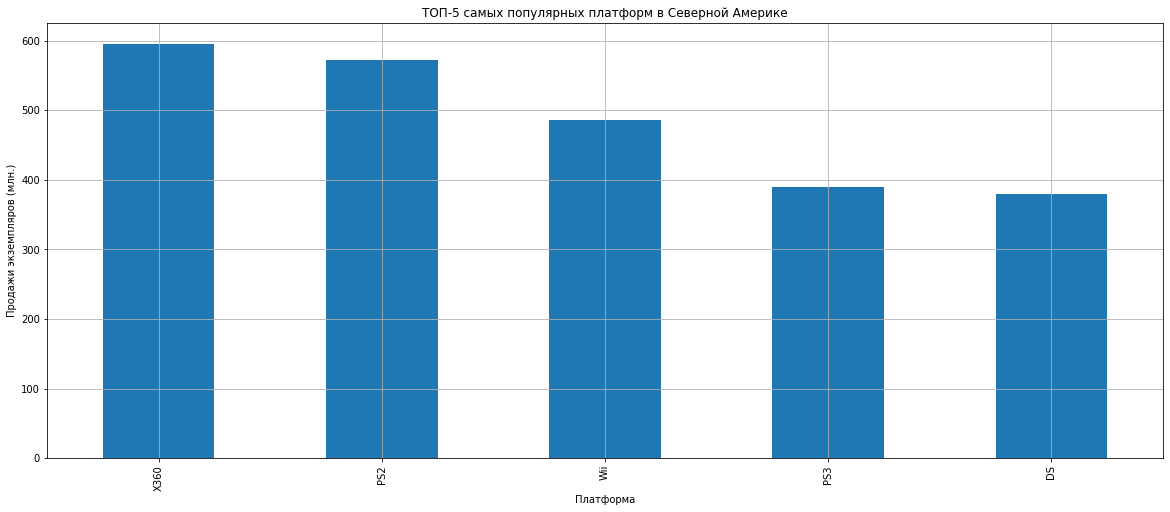

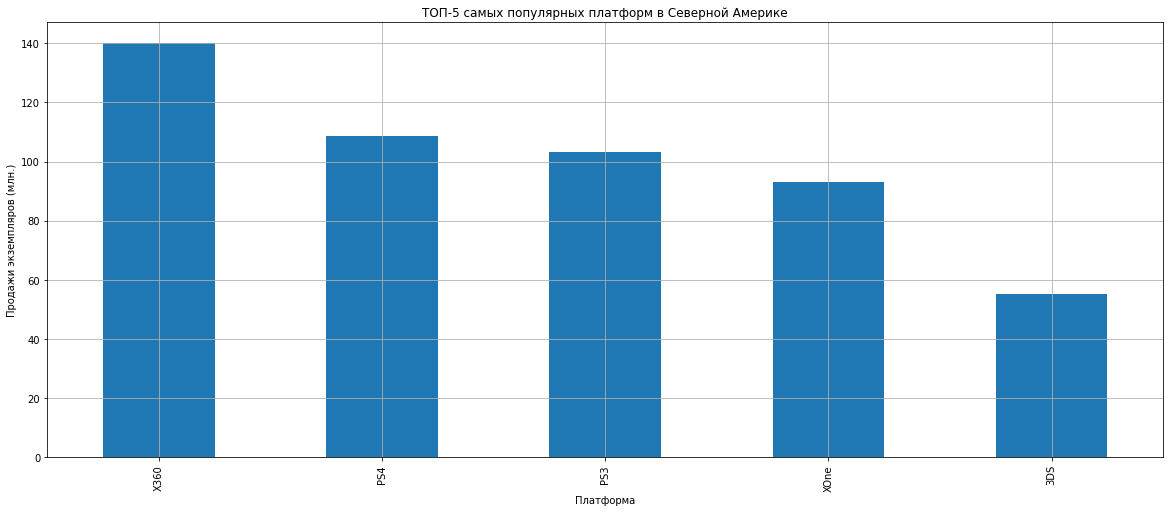

In [ ]:
# ТОП-5 самых популярных платформ в Северной Америке
platform_na_all = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_na_all.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
# ТОП-5 самых популярных платформ в Северной Америке за последние пять лет
platform_na_2012_2016 = df_2012_2016.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_na_2012_2016.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [ ]:
# считаем долю продаж в Северной Америке за последние 5 лет
# переменной platform_count присваиваем сумму общих продаж по всем платформам
platform_count_full = df.groupby('platform')['total_sales'].sum()
percent_na = platform_na_2012_2016 / platform_count_full * 100
display(percent_na.sort_values(ascending=False).head(5))

platform
XOne    58.448406
PS4     34.615140
3DS     21.453784
X360    14.569722
PS3     11.100135
dtype: float64

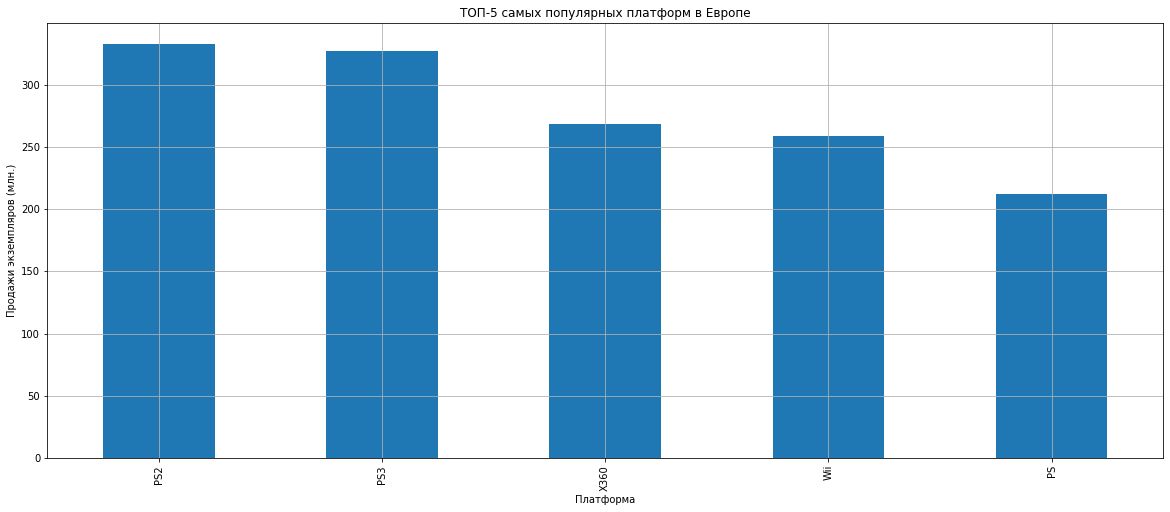

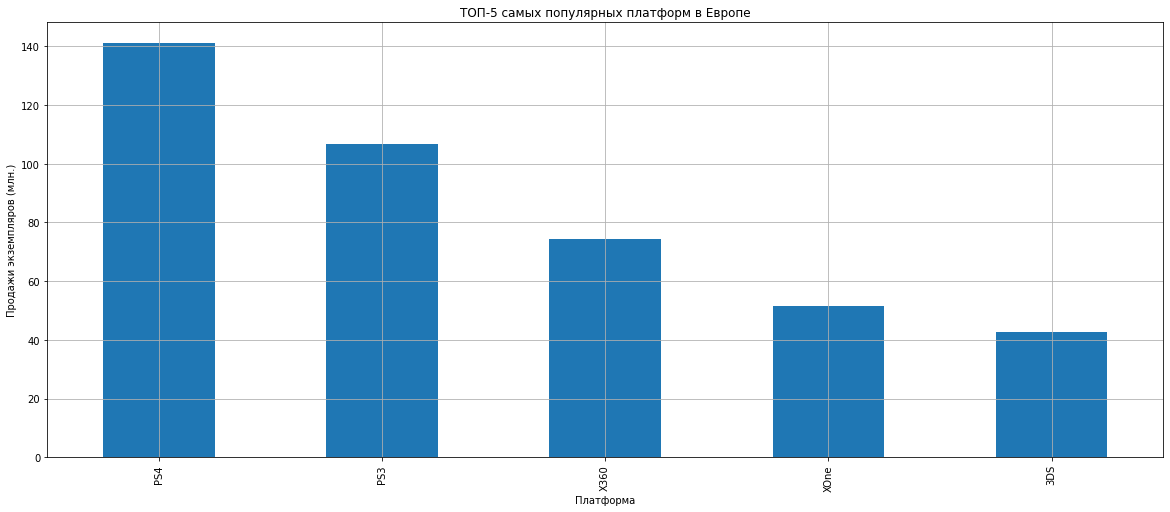

In [ ]:
# ТОП-5 самых популярных платформ в Европе
platform_eu_all = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_eu_all.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
# ТОП-5 самых популярных платформ в Европе за последние пять лет
platform_eu_2012_2016 = df_2012_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_eu_2012_2016.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [ ]:
# считаем долю продаж в Европе за последние 5 лет
percent_eu = platform_eu_2012_2016 / platform_count_full * 100
display(percent_eu.sort_values(ascending=False).head(5))

platform
PS4     44.913096
XOne    32.381371
3DS     16.539312
PS3     11.473790
X360     7.752486
dtype: float64

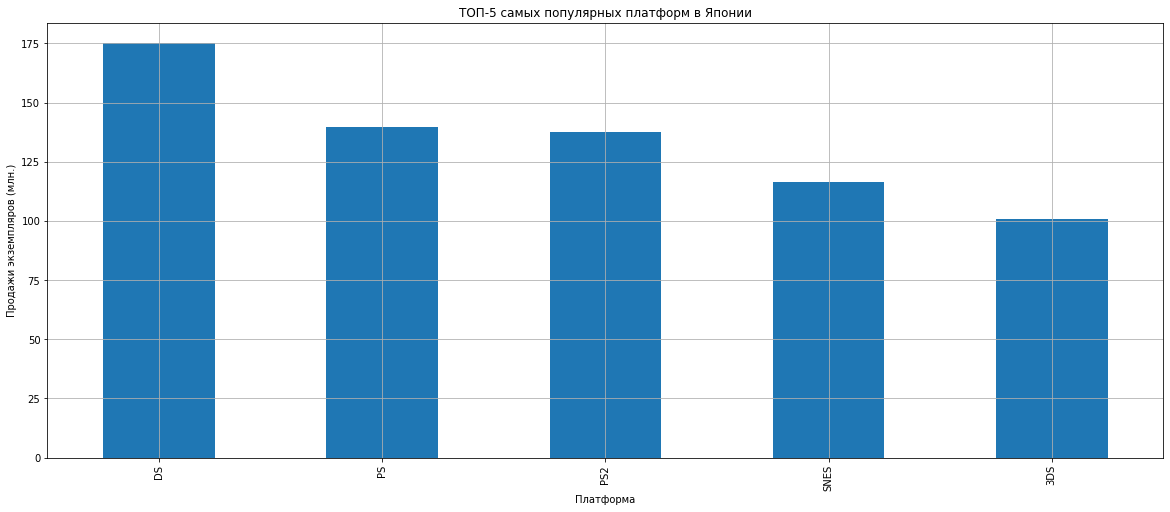

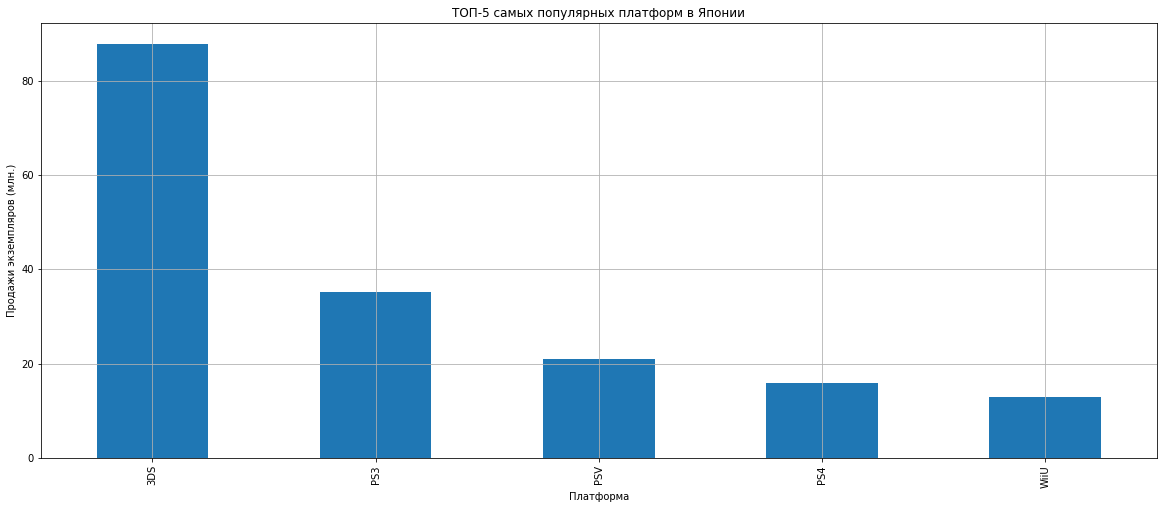

In [ ]:
# ТОП-5 самых популярных платформ в Японии
platform_jp_all = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_jp_all.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
# ТОП-5 самых популярных платформ в Японии за последние пять лет
platform_jp_2012_2016 = df_2012_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_jp_2012_2016.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [ ]:
# считаем долю продаж в Японии за последние 5 лет
percent_jp = platform_jp_2012_2016 / platform_count_full * 100
display(percent_jp.sort_values(ascending=False).head(5))

platform
PSV     39.100539
3DS     34.052209
WiiU    15.829176
PS4      5.080537
PS3      3.789164
dtype: float64

Самые популярные платформы (топ-5) для Северной Америки за последние 5 лет:
X360, PS4, PS3, XOne,  3DS.
А самая большая доля продаж для Северной Америки от всего рынка пришлась на XOne. 

Самые популярные платформы (топ-5) для Европы за последние 5 лет:
PS4, PS3, XOne, X360, 3DS.
А самая большая доля продаж для Европы от всего рынка пришлась на PS4.

Самые популярные платформы (топ-5) для Японии за последние 5 лет:
3DS, PS3, PSV, PS4, WIU. 
А самая большая доля продаж для Японии от всего рынка пришлась на 3DS.

##### Самые популярные жанры (топ-5). 

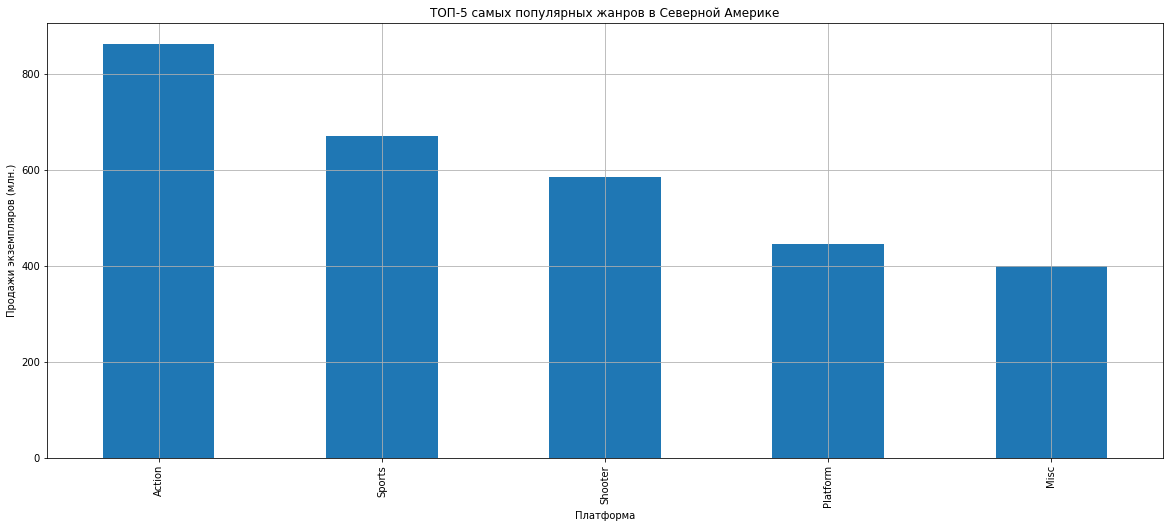

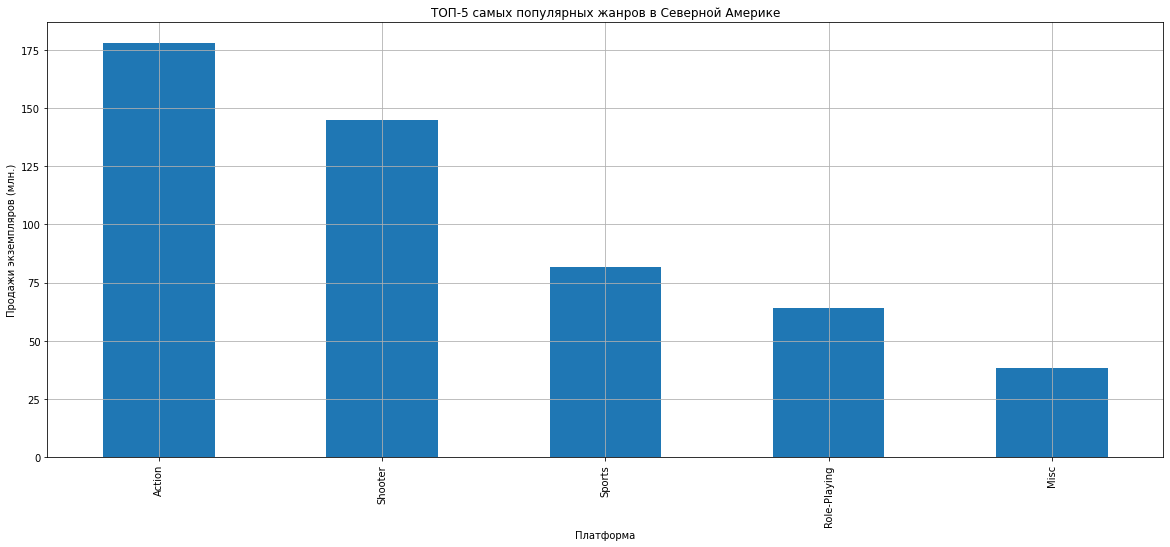

In [ ]:
# ТОП-5 самых популярных жанров в Северной Америке
genre_na_all = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_na_all.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
# ТОП-5 самых популярных жанров в Северной Америке за последние пять лет
genre_na_2012_2016 = df_2012_2016.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_na_2012_2016.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [ ]:
# считаем долю продаж в Северной Америке за последние 5 лет
genre_count_full = df.groupby('genre')['total_sales'].sum()
genre_percent_na = genre_na_2012_2016 / genre_count_full * 100
display(genre_percent_na.sort_values(ascending=False).head(5))

genre
Shooter         13.902013
Action          10.360497
Role-Playing     6.873738
Sports           6.225232
Misc             4.832403
dtype: float64

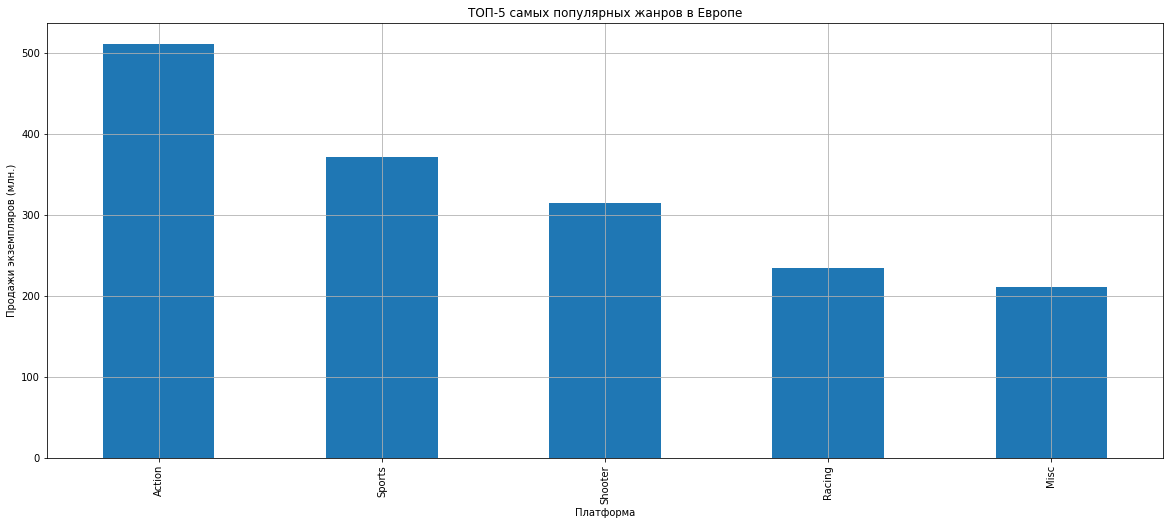

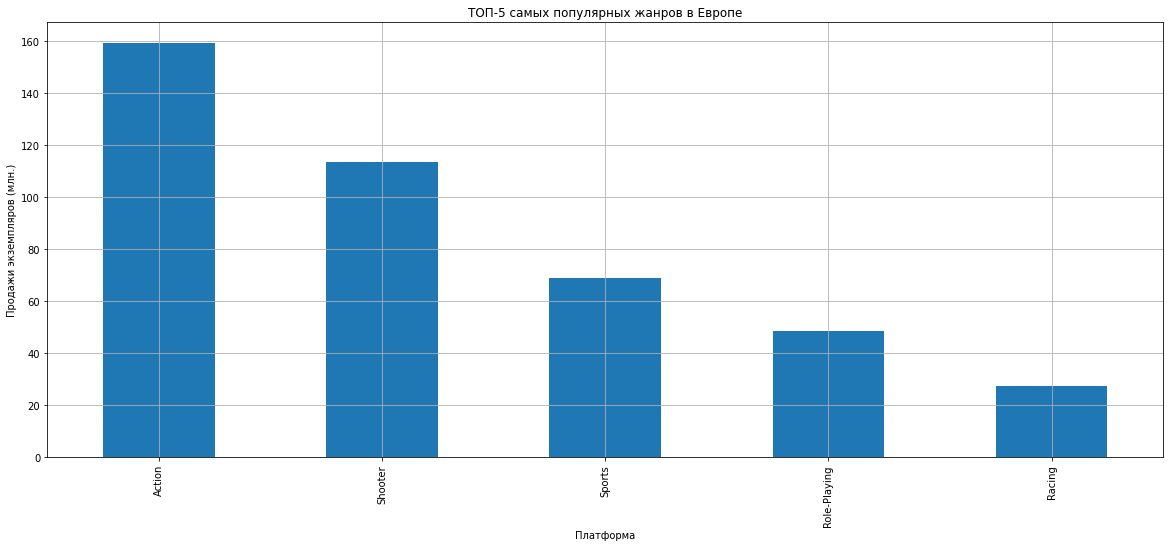

In [ ]:
# ТОП-5 самых популярных жанров в Европе
genre_eu_all = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_eu_all.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
# ТОП-5 самых популярных жанров в Европе за последние пять лет
genre_eu_2012_2016 = df_2012_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_eu_2012_2016.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [ ]:
# считаем долю продаж в Европе за последние 5 лет
genre_percent_eu = genre_eu_2012_2016 / genre_count_full * 100
display(genre_percent_eu.sort_values(ascending=False).head(5))

genre
Shooter         10.896328
Action           9.282735
Sports           5.275375
Role-Playing     5.212227
Racing           3.771994
dtype: float64

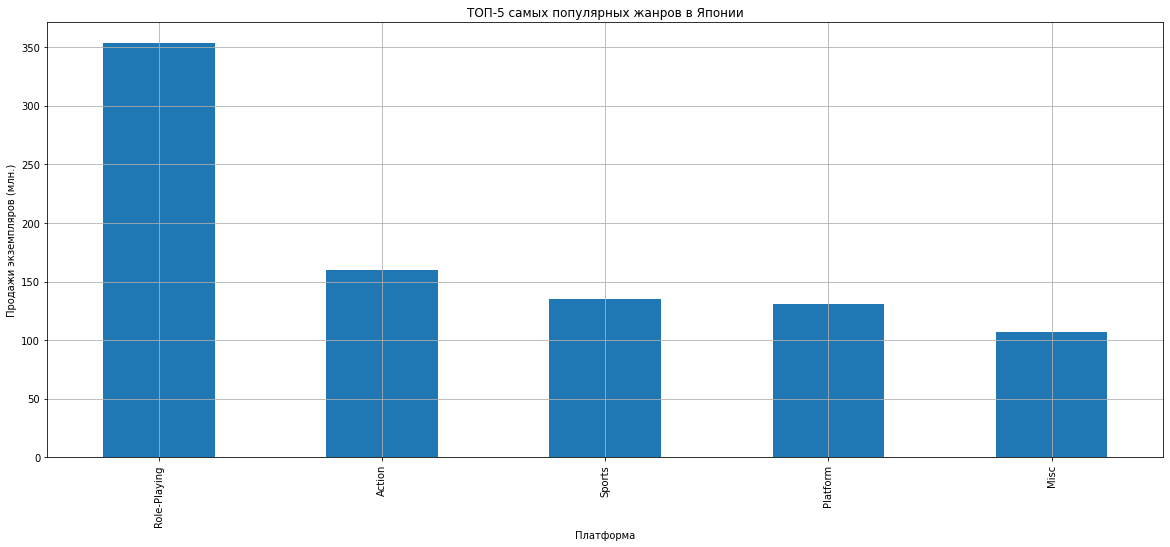

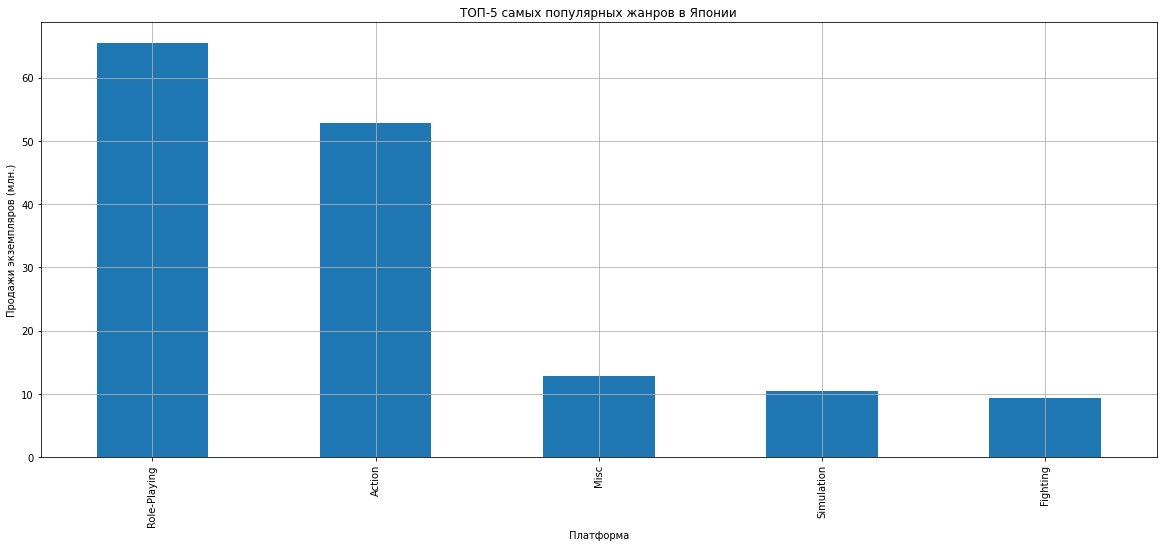

In [ ]:
# ТОП-5 самых популярных жанров в Японии
genre_jp_all = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
genre_jp_all.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
# ТОП-5 самых популярных жанров в Японии за последние пять лет
genre_jp_2012_2016 = df_2012_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
genre_jp_2012_2016.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [ ]:
# считаем долю продаж в Японии за последние 5 лет
genre_percent_jp = genre_jp_2012_2016 / genre_count_full * 100
display(genre_percent_jp.sort_values(ascending=False).head(5))

genre
Role-Playing    7.028397
Action          3.075991
Simulation      2.683266
Fighting        2.132562
Misc            1.627251
dtype: float64

Самые популярные жанры (топ-5) для Северной Америки за последние 5 лет:
Shooter, Action, Sports, Role-Playing, Misc.
А самая большая доля продаж для Северной Америки от всего рынка пришлась на Action. 

Самые популярные жанры (топ-5) для Европы за последние 5 лет:
Shooter, Action, Sports, Role-Playing, Racing.
А самая большая доля продаж для Европы от всего рынка пришлась на Action.

Самые популярные жанры (топ-5) для Японии за последние 5 лет:
Role-Playing, Simulation, Action, Fighting, Misc. 
А самая большая доля продаж для Японии от всего рынка пришлась на Role-Playing.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

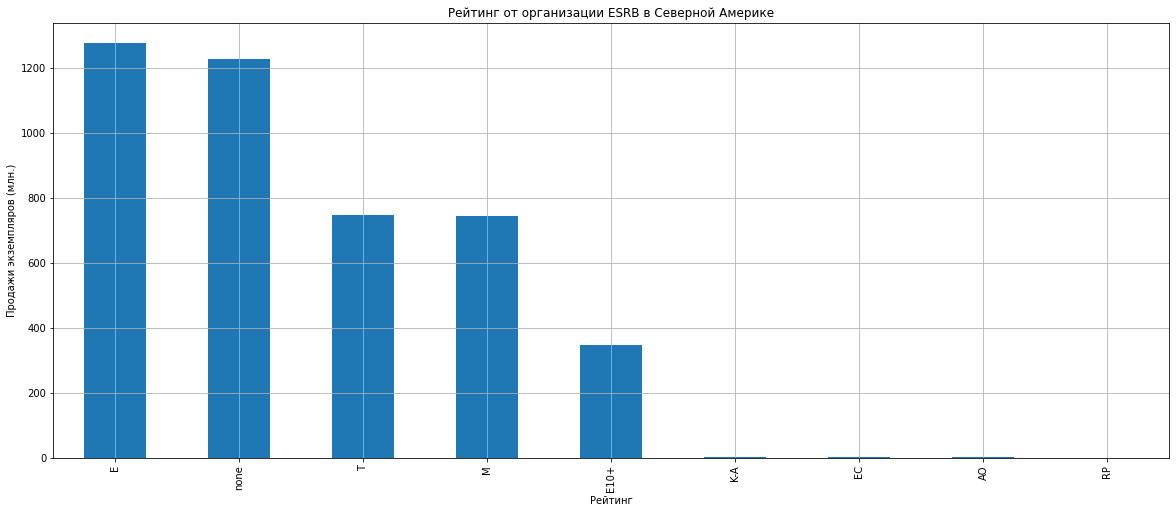

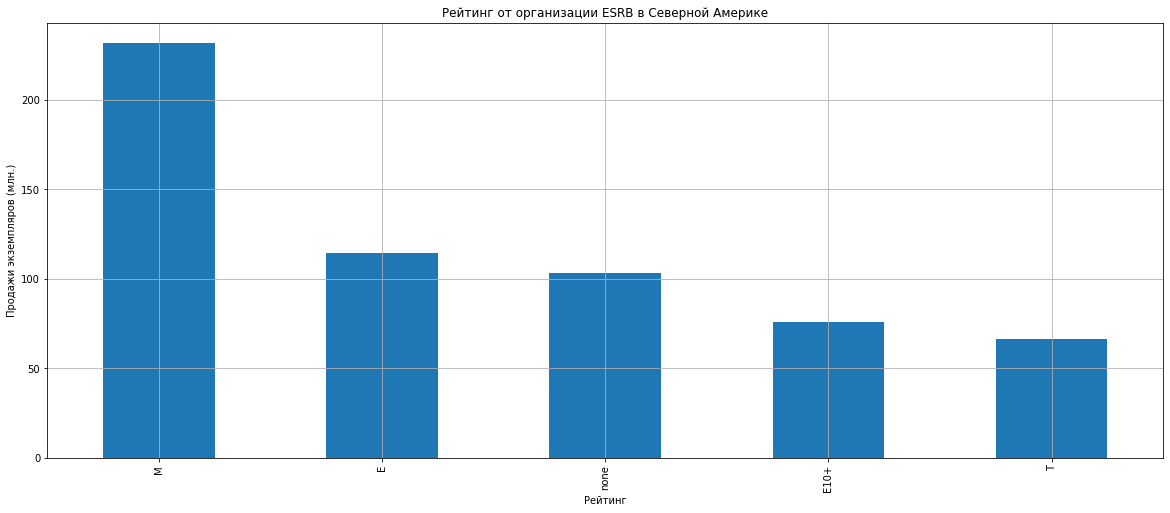

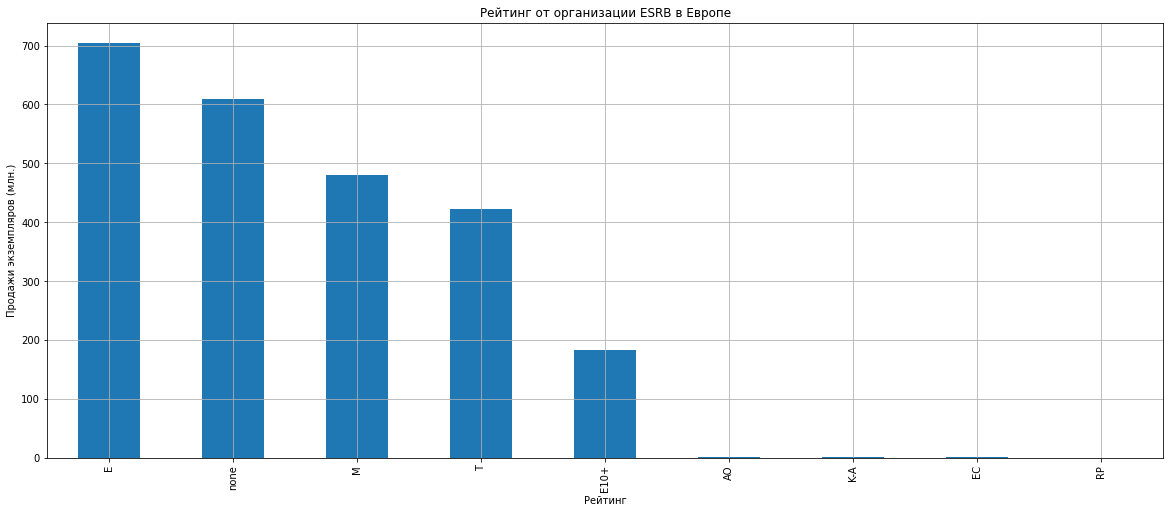

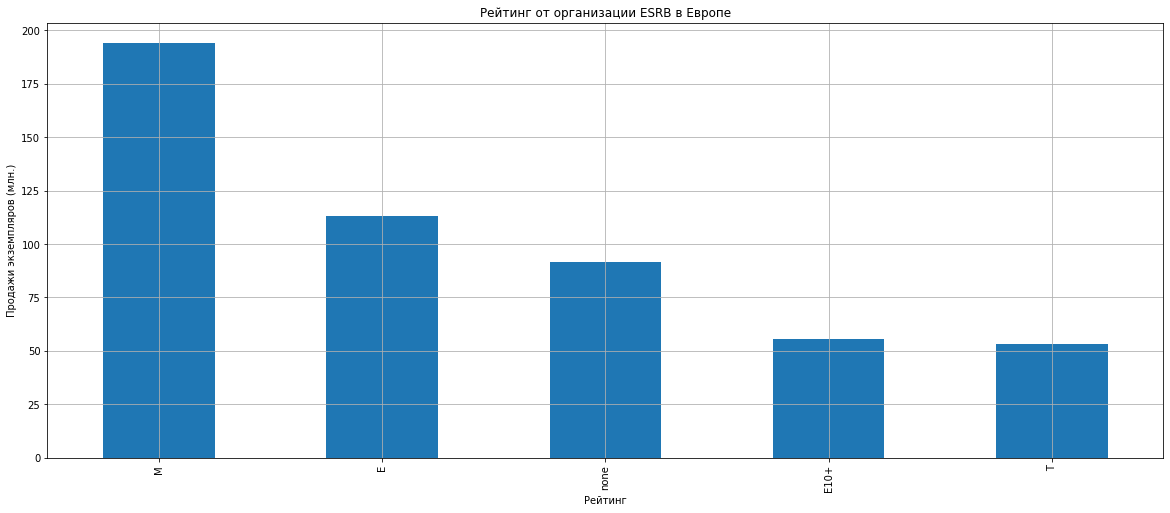

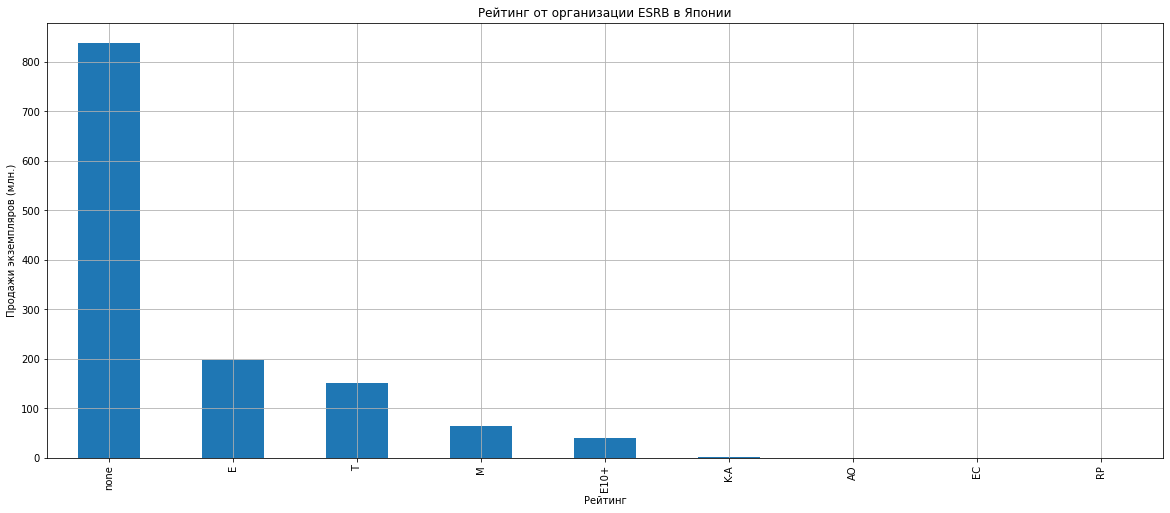

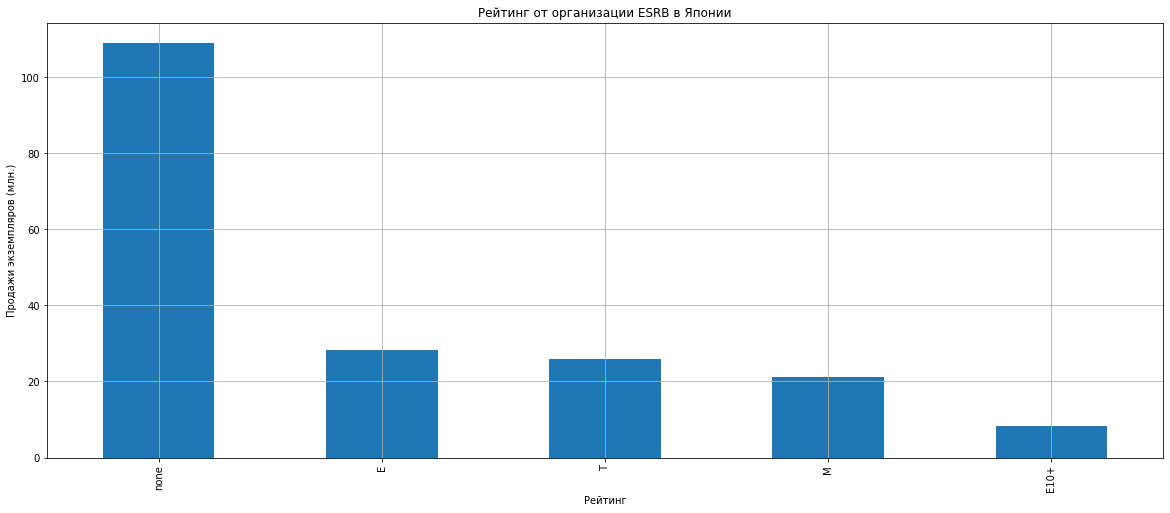

In [ ]:
#  Рейтинг от организации ESRB в Северной Америке за все время
rating_na = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
#  Рейтинг от организации ESRB в Северной Америке за последние 5 лет
rating_na = df_2012_2016.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
#  Рейтинг от организации ESRB в Европе за все время
rating_eu = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
#  Рейтинг от организации ESRB в Европе за последние 5 лет
rating_eu = df_2012_2016.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
#  Рейтинг от организации ESRB в Японии за все время
rating_jp = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()
#  Рейтинг от организации ESRB в Японии за последние 5 лет
rating_jp = df_2012_2016.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Северной Америке за последние 5 лет самым популярным рейтингом является "М", а за все время "ш".
В Европе за последние 5 лет самым популярным рейтингом является "М", а за все время "ш".
В Японии за последние 5 лет самым популярным рейтингом является "none", т.е. пропуски, а следующим по популярности, как и за все время является "ш".

#### Вывод.

Мы выявили самые популярные платформы и жанры. А также выяснили как влияет рейтинг.

Самые популярные платформы (топ-5) для Северной Америки за последние 5 лет:
X360, PS4, PS3, XOne,  3DS.
А самая большая доля продаж для Северной Америки от всего рынка пришлась на XOne. 

Самые популярные платформы (топ-5) для Европы за последние 5 лет:
PS4, PS3, XOne, X360, 3DS.
А самая большая доля продаж для Европы от всего рынка пришлась на PS4.

Самые популярные платформы (топ-5) для Японии за последние 5 лет:
3DS, PS3, PS4, X360, XOne. 
А самая большая доля продаж для Японии от всего рынка пришлась на 3DS.

Самые популярные жанры (топ-5) для Северной Америки за последние 5 лет:
Shooter, Action, Sports, Role-Playing, Misc.
А самая большая доля продаж для Северной Америки от всего рынка пришлась на Action. 

Самые популярные жанры (топ-5) для Европы за последние 5 лет:
Shooter, Action, Sports, Role-Playing, Racing.
А самая большая доля продаж для Европы от всего рынка пришлась на Action.

Самые популярные жанры (топ-5) для Японии за последние 5 лет:
Role-Playing, Simulation, Action, Fighting, Misc. 
А самая большая доля продаж для Японии от всего рынка пришлась на Role-Playing.

В Северной Америке за последние 5 лет самым популярным рейтингом является "М", а за все время "ш".
В Европе за последние 5 лет самым популярным рейтингом является "М", а за все время "ш".
В Японии за последние 5 лет самым популярным рейтингом является "none", т.е. пропуски, а следующим по популярности, как и за все время является "ш".

### Проверим гипотезы

#### Check gap 
   + Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   + Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
   + Зададим пороговое значение alpha.
   + Поясним:
        Как мы сформулировали нулевую и альтернативную гипотезы;
        Какой критерий применили для проверки гипотез и почему.

#### Проверка гипотезы пользовательские рейтинги платформ Xbox One и PC одинаковые;

Для проверки гипотезы придумаем нулевую и альтернативную гипотезы:
 + H0: средние рейтинги по платформам одинаковые
 + H1: средние рейтинги по платформам разные

In [ ]:
# убираем значения, которые были пропусками
df_isna = df_2012_2016.dropna(subset=['user_score'])
# выбрали необходимые приставки
df_xbox = df_isna[df_isna['platform'] == 'XOne']
df_pc = df_isna[df_isna['platform'] == 'PC']
# выбрали столбцы с пользовательскими рейтингами
xbox_1 = df_xbox['user_score']
pc_1 = df_pc['user_score']
# выбрал критический уровень статистической значимости
alpha = .05 

results = st.ttest_ind(
xbox_1,
pc_1)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние рейтинги Xbox One и PC одинаковые.

#### Проверка гипотезы средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотезы придумаем нулевую и альтернативную гипотезы:
 + H0: средние рейтинги по платформам одинаковые
 + H1: средние рейтинги по платформам разные

In [ ]:
# выбрали необходимые приставки
df_action = df_isna[df_isna['genre'] == 'Action']
df_sports = df_isna[df_isna['genre'] == 'Sports']
# выбрали столбцы с пользовательскими рейтингами
action = df_action['user_score']
sports = df_sports['user_score']
# выбрал критический уровень статистической значимости
alpha = .05 

results = st.ttest_ind(
action,
sports)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Вывод: Средние рейтинги Action и Sports разные.

### Общий вывод

Мы исследовали данные для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.
В каждом этапе сделали промежуточные выводы. 
По итогам попробую сделать прогноз на 2017 год в игровой индустрии.

За последние пять лет в ТОП-5 самых продаваемых платформ вошли: PS4, PS3, X360, 3DS , XOne.

Самой популярной платформой в мире является - PS4.

Предпочтения по жанрам игр у каждой страны свои, но большинство склоняется к жанрам Shooter, Action, Sports, Role-Playing.

В рейтинг от организации ESRB за последние 5 лет самым популярным рейтингом является "М", и после следует "ш". 

На следующий год ставку можно делать на платформу PS4, в жанрах Shooter, Action, Sports, Role-Playing.